In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [18]:
df = pd.DataFrame({
    'iq': [90, 100, 110, 120, 80],
    'cgpa': [8, 7, 6, 9, 5],
    'salary': [3, 4, 8, 6, 3]})
df

,iq,cgpa,salary
0,90,8,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


**Here, we will train 3 models sequentially, m1 = f0(x), m2 = f1(x), m3 = f2(x). and final output is given by combination of all the models.**

In [19]:
# Output of first model, m1 = f0(x) is always the mean of target column
df['f0(x)'] = df['salary'].mean()
df

,iq,cgpa,salary,f0(x)
0,90,8,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


In [20]:
# Now we calculate pseudo-residual of first model
df['res1'] = df['salary'] - df['f0(x)']
df

,iq,cgpa,salary,f0(x),res1
0,90,8,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


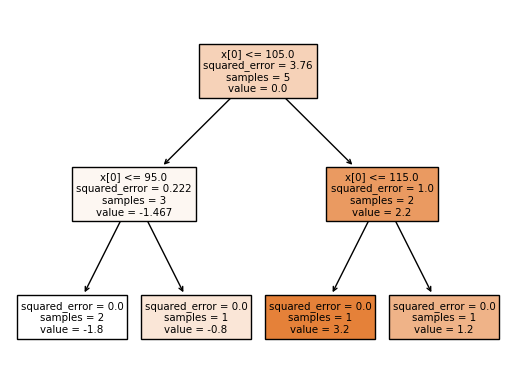

In [21]:
# Now, we need to fit a decision tree regreessor on the input features and residual of first model (m1) i.e., ri1
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(df[['iq', 'cgpa']], df['res1'])
plot_tree(dt1, filled=True)
plt.show()

In [22]:
# Output of model 2 (m2)  = output of model 1 (m1) + learning_rate * output of dt1, here learning_rate=0.1
df['f1(x)'] = df['f0(x)'] + 0.1* dt1.predict(df[['iq', 'cgpa']])
df

,iq,cgpa,salary,f0(x),res1,f1(x)
0,90,8,3,4.8,-1.8,4.62
1,100,7,4,4.8,-0.8,4.72
2,110,6,8,4.8,3.2,5.12
3,120,9,6,4.8,1.2,4.92
4,80,5,3,4.8,-1.8,4.62


In [23]:
# Calculating pseudo-residual for model 2 (m2), by target - prediction of model 2 (m2)
# We can notice residual will get decreased as we added the model and our prediction also start moving in direction of correct target
df['res2'] = df['salary'] - df['f1(x)']
df

,iq,cgpa,salary,f0(x),res1,f1(x),res2
0,90,8,3,4.8,-1.8,4.62,-1.62
1,100,7,4,4.8,-0.8,4.72,-0.72
2,110,6,8,4.8,3.2,5.12,2.88
3,120,9,6,4.8,1.2,4.92,1.08
4,80,5,3,4.8,-1.8,4.62,-1.62


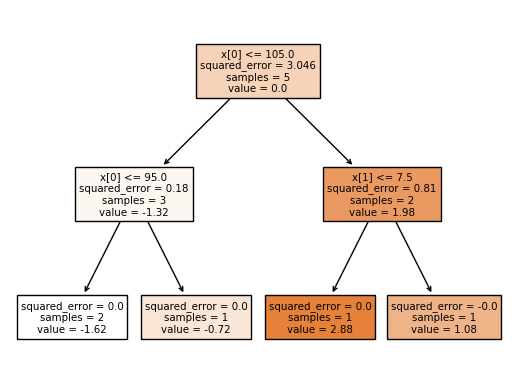

In [24]:
# Now, we need to fit a decision tree regreessor on the input features and residual of second model i.e., res2
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(df[['iq', 'cgpa']], df['res2'])
plot_tree(dt2, filled=True)
plt.show()

In [25]:
# Output of model_3  = output of model 3 (m3) + learning_rate * output of dt2, here learning_rate=0.1
df['f2(x)'] = df['f1(x)'] + 0.1* dt2.predict(df[['iq', 'cgpa']])
df

,iq,cgpa,salary,f0(x),res1,f1(x),res2,f2(x)
0,90,8,3,4.8,-1.8,4.62,-1.62,4.458
1,100,7,4,4.8,-0.8,4.72,-0.72,4.648
2,110,6,8,4.8,3.2,5.12,2.88,5.408
3,120,9,6,4.8,1.2,4.92,1.08,5.028
4,80,5,3,4.8,-1.8,4.62,-1.62,4.458


In [26]:
# Calculating pseudo-residual for model 3 (m3), by target - prediction of model 3
# We can notice residual will get decreased as we added the model and our prediction also start moving in direction of correct target
df['res3'] = df['salary'] - df['f2(x)']
df

,iq,cgpa,salary,f0(x),res1,f1(x),res2,f2(x),res3
0,90,8,3,4.8,-1.8,4.62,-1.62,4.458,-1.458
1,100,7,4,4.8,-0.8,4.72,-0.72,4.648,-0.648
2,110,6,8,4.8,3.2,5.12,2.88,5.408,2.592
3,120,9,6,4.8,1.2,4.92,1.08,5.028,0.972
4,80,5,3,4.8,-1.8,4.62,-1.62,4.458,-1.458
